In [1]:
import sys 
sys.path.append('../lznestpy')

import nestpy
from random import choices
from nestUtils import *

import matplotlib.pyplot as plt
import numpy as np

from LXeSimulation import *
from LArSimulation import *

import numpy as np

nEvents = 100000

In [2]:
def calculateSignalSignificance(eventRateFile, bkgRateFiles, exposure):
    # Simulate observed events and background events
    
    nPrimarySig, nRecombinationSig, nObservedSig, energiesSig, weightSig = simulate_LAr_Primary(eventRateFile, nEvents)
    histObserved, edges = np.histogram(nObservedSig, bins=np.arange(0, 100), weights=weightSig)
    totalSignal = np.trapz(histObserved[3:50], edges[3:50])

    totalBkg = 0
    for bkgRateFile in bkgRateFiles:
        BKGArray = np.loadtxt(bkgRateFile,  skiprows=1,delimiter=',')
        nElectrons, nBkgEvents = BKGArray[:,0], BKGArray[:,1]*365.25*1000
        totalBkg += np.trapz(nBkgEvents, nElectrons)


    return (totalSignal / np.sqrt(totalBkg)) * np.sqrt(exposure), histObserved, nBkgEvents, nElectrons, edges[1:]



In [3]:
def parse_argon_filename_auto(filename):
    """
    Parse Argon filename to extract model parameters
    Format example: mpi7_PS-PS_mchi10_gchi0.6_cHiggs0_EventRate
    
    Returns:
        mphi: Mediator mass in GeV (float)
        is_ps_ps: Whether interaction type is PS-PS (bool)
        mchi: DM mass in GeV (float) 
        gchi: DM coupling (float)
        c_higgs: Higgs coupling (float)
    """
    import re
    
    # Extract mphi
    mphi = float(re.search(r'mpi(\d+(?:\.\d+)?)', filename).group(1))
    
    # Check if PS-PS exists
    is_ps_ps = 'PS-PS' in filename
    
    # Extract mchi
    mchi = float(re.search(r'mchi(\d+(?:\.\d+)?)', filename).group(1))

    # Extract gchi
    gchi = float(re.search(r'gchi(\d+(?:\.\d+)?)', filename).group(1))

    # Extract gSM
    gSM = float(re.search(r'gSM(\d+(?:\.\d+)?)', filename).group(1))
    
    # Extract cHiggs
    c_higgs = float(re.search(r'cHiggs(\d+(?:\.\d+)?)', filename).group(1))
    
    return mphi, is_ps_ps, mchi, gchi, gSM,c_higgs

print(parse_argon_filename_auto("mpi7_PS-PS_mchi95_gchi1._gSM0.6_cHiggs0.01_EventRate.csv"))

(7.0, True, 95.0, 1.0, 0.6, 0.01)


In [4]:
# ArgonEventRateFolder = "/Users/yxu/workbenches/XeArLoopworkbench/EventRatesMMA/Argon_auto_heatmap"
ArgonEventRateFolder = "/Users/yxu/workbenches/XeArLoopworkbench/EventRatesMMA/Argon_auto_heatmap_zoom"
ArgoEventRateFiles = sorted(os.listdir(ArgonEventRateFolder))
DMLMExposure = 1.0

mphi_table = []
is_ps_ps_table = []
mchi_table = []
gchi_table = []
gSM_table = []
c_higgs_table = []
significance_table = []

for ArgoEventRateFile in ArgoEventRateFiles:
    print(f"{ArgonEventRateFolder}/{ArgoEventRateFile}",)
    mphi, is_ps_ps, mchi, gchi, gSM, c_higgs = parse_argon_filename_auto(ArgoEventRateFile)
    significance_current = calculateSignalSignificance(f"{ArgonEventRateFolder}/{ArgoEventRateFile}",
                                                        ["/Users/yxu/workbenches/XeArLoopworkbench/Gamma_DSLM_afterCut.txt",
                                                         "/Users/yxu/workbenches/XeArLoopworkbench/Ar39_agressive_DSLM_afterCut.txt"], 
                                                        DMLMExposure)    
    mphi_table.append(mphi)
    is_ps_ps_table.append(is_ps_ps)
    mchi_table.append(mchi)
    gchi_table.append(gchi)
    gSM_table.append(gSM)
    c_higgs_table.append(c_higgs)
    significance_table.append(significance_current[0])

/Users/yxu/workbenches/XeArLoopworkbench/EventRatesMMA/Argon_auto_heatmap_zoom/mpi7_S-PS_mchi10_gchi1.1_gSM0.6_cHiggs0.01_EventRate.csv
Total rate is:  1.999779976154902
/Users/yxu/workbenches/XeArLoopworkbench/EventRatesMMA/Argon_auto_heatmap_zoom/mpi7_S-PS_mchi10_gchi1.2_gSM0.6_cHiggs0.01_EventRate.csv
Total rate is:  2.832281783044058
/Users/yxu/workbenches/XeArLoopworkbench/EventRatesMMA/Argon_auto_heatmap_zoom/mpi7_S-PS_mchi10_gchi1.3_gSM0.6_cHiggs0.01_EventRate.csv
Total rate is:  3.901080247179848
/Users/yxu/workbenches/XeArLoopworkbench/EventRatesMMA/Argon_auto_heatmap_zoom/mpi7_S-PS_mchi10_gchi1.4_gSM0.6_cHiggs0.01_EventRate.csv
Total rate is:  5.247151667506772
/Users/yxu/workbenches/XeArLoopworkbench/EventRatesMMA/Argon_auto_heatmap_zoom/mpi7_S-PS_mchi10_gchi1.5_gSM0.6_cHiggs0.01_EventRate.csv
Total rate is:  6.914750446884902
/Users/yxu/workbenches/XeArLoopworkbench/EventRatesMMA/Argon_auto_heatmap_zoom/mpi7_S-PS_mchi10_gchi1.6_gSM0.6_cHiggs0.01_EventRate.csv
Total rate is:

In [5]:
mphi_array = np.array(mphi_table)
is_ps_ps_array = np.array(is_ps_ps_table)
mchi_array = np.array(mchi_table)
gchi_array = np.array(gchi_table)
gSM_array = np.array(gSM_table)
c_higgs_array = np.array(c_higgs_table)
significance_array = np.array(significance_table)

print(mphi_array.shape)
print(is_ps_ps_array.shape)
print(mchi_array.shape)
print(gchi_array.shape)
print(gSM_array.shape)
print(c_higgs_array.shape)
print(significance_array.shape)

print(mphi_array[:10])
print(is_ps_ps_array[:10])
print(mchi_array[:100])
print(gchi_array[:10])
print(gSM_array[:10])
print(c_higgs_array[:10])
print(significance_array[:10])


(567,)
(567,)
(567,)
(567,)
(567,)
(567,)
(567,)
[7. 7. 7. 7. 7. 7. 7. 7. 7. 7.]
[False False False False False False False False False False]
[10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11.
 11. 11. 11. 11. 11. 11. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12.
 12. 12. 12. 12. 12. 12. 12. 12. 12. 13. 13. 13. 13. 13. 13. 13. 13. 13.
 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 14. 14. 14. 14. 14. 14.
 14. 14. 14. 14. 14. 14. 14. 14. 14. 14.]
[1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 1. ]
[0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6]
[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
[0.03110384 0.04402813 0.06060532 0.08168913 0.10757036 0.13903781
 0.17746628 0.22276769 0.27669565 0.02124604]


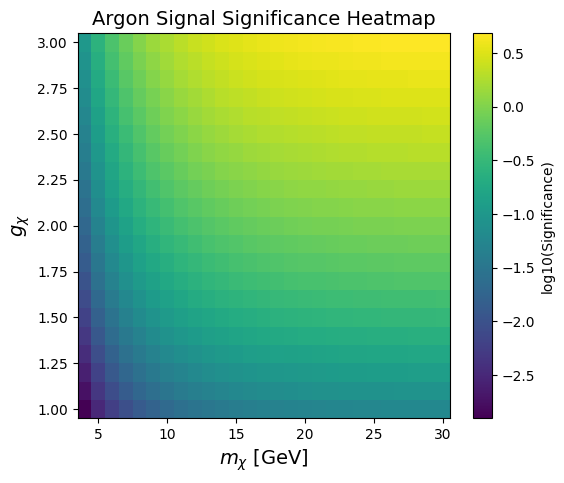

In [8]:
plt.figure(figsize=(6, 5))

# Create unique values for mchi and gchi to form grid
unique_mchi = np.unique(mchi_array)
unique_gchi = np.unique(gchi_array)

# Create a 2D grid for the heatmap
grid = np.zeros((len(unique_gchi), len(unique_mchi)))

# Fill the grid with log10(significance) values
for i, gchi_val in enumerate(unique_gchi):
    for j, mchi_val in enumerate(unique_mchi):
        mask = (mchi_array == mchi_val) & (gchi_array == gchi_val)
        if np.any(mask):
            grid[i,j] = np.log10(significance_array[mask][0])

# Create heatmap
plt.pcolormesh(unique_mchi, unique_gchi, grid, shading='auto', cmap='viridis')
plt.colorbar(label='log10(Significance)')

plt.xlabel(r'$m_\chi$ [GeV]',fontsize=14)
plt.ylabel(r'$g_\chi$',fontsize=14)
plt.title('Argon Signal Significance Heatmap',fontsize=14)

# plt.yscale('log')
# plt.xscale('log')

plt.savefig("Argon_Signal_Significance_Heatmap_zoomedIn.pdf",dpi=150)
plt.show()



In [7]:
# Save the heatmap data to a CSV file
import pandas as pd

# Create DataFrame with mchi values as index and gchi values as columns
df = pd.DataFrame(grid, index=unique_gchi, columns=unique_mchi)

# Save to CSV with header and index
df.to_csv('Argon_Signal_Significance_Heatmap.csv')
